In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultrasound-fetus-dataset/ultrasound_fetus.csv
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/FetusDataset.csv
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/Resnet_fineTuning.pth
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/Datasets/benign/245_HC.png
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/Datasets/benign/211_2HC.png
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/Datasets/benign/247_2HC.png
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/Datasets/benign/137_HC.png
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/Datasets/benign/72_HC.png
/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasou

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

2025-10-03 13:13:33.587117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759497213.842990      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759497213.909336      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df = pd.read_csv('/kaggle/input/ultrasound-fetus-dataset/ultrasound_fetus.csv')
df.head()

,Parent Directory,Subdirectory,File Count
0,Datasets,benign,391
1,Datasets,malignant,2209
2,Datasets,normal,366
3,OverlayedImages,benign,51
4,OverlayedImages,malignant,300


In [5]:
df.columns

Index(['Parent Directory', 'Subdirectory', 'File Count'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Parent Directory  15 non-null     object
 1   Subdirectory      15 non-null     object
 2   File Count        15 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 492.0+ bytes


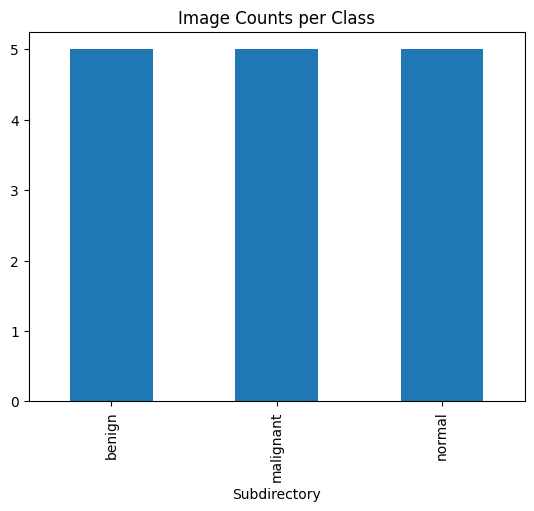

In [7]:
df['Subdirectory'].value_counts().plot(kind='bar', title='Image Counts per Class')
plt.show()

In [8]:
# Image folder path
img_dir = '/kaggle/input/ultrasound-fetus-dataset/Ultrasound Fetus Dataset/Ultrasound Fetus Dataset/Data/Data/train'

# Function to load images
def load_images(df, img_dir, img_size=64):
    X, y = [], []
    for folder in df['Subdirectory'].unique():
        path = os.path.join(img_dir, folder)
        for file in os.listdir(path):
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(folder)
    return np.array(X), np.array(y)

X, y = load_images(df, img_dir)

In [9]:
# Normalize and reshape images
X = X / 255.0
X = X.reshape(-1, 64, 64, 1)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

2025-10-03 13:14:09.706844: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7154 - loss: 0.7579 - val_accuracy: 0.7565 - val_loss: 0.5951
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7292 - loss: 0.6050 - val_accuracy: 0.7565 - val_loss: 0.6238
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7445 - loss: 0.5756 - val_accuracy: 0.7539 - val_loss: 0.5791
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7667 - loss: 0.5248 - val_accuracy: 0.7513 - val_loss: 0.5817
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7757 - loss: 0.4698 - val_accuracy: 0.7461 - val_loss: 0.5706


In [12]:
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7627 - loss: 0.5584
✅ Test Accuracy: 0.75


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


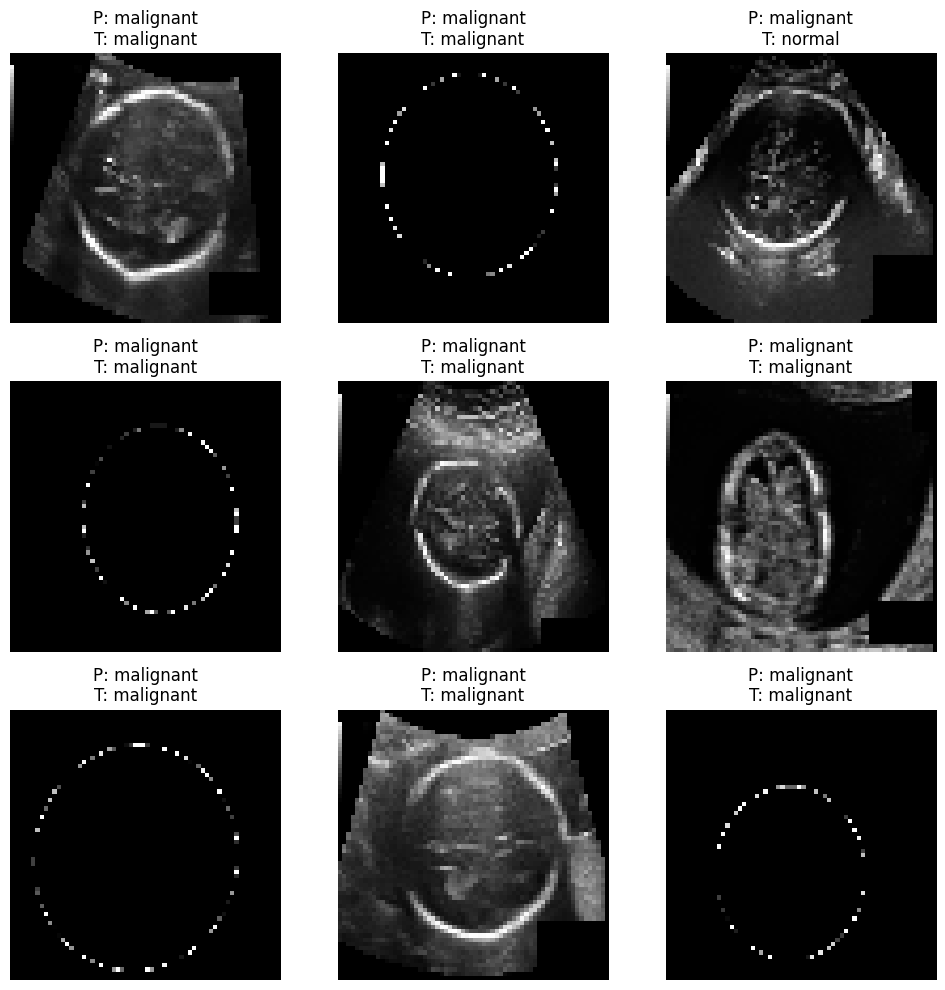

In [13]:
# Show a few predictions
pred = model.predict(X_test[:9])
pred_labels = le.inverse_transform(np.argmax(pred, axis=1))
true_labels = le.inverse_transform(np.argmax(y_test[:9], axis=1))

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"P: {pred_labels[i]}\nT: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()